In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
ads_selected = []
ads_rewards=[0]* len(dataset.iloc[0,:].values)
ads_no_of_selections=[0]*len(dataset.iloc[0,:].values)
total_rewards =0
tests= len(dataset.iloc[:,0].values)

***### here we first let all the ads to get selected once and then actual process starts ###***

In [6]:
for n in range(0,tests-9000):
    ad=-1
    max_upper_bound =0
    for i in range(0,len(dataset.iloc[0,:].values)):
        if ads_no_of_selections[i]>0 :
            avg_reward= ads_rewards[i]/ads_no_of_selections[i]
            delta_n = math.sqrt(3/2 * math.log(n + 1)/ads_no_of_selections[i])
            upper_bound = avg_reward+delta_n
        else :
            upper_bound=1e400
        if upper_bound > max_upper_bound :
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    ads_no_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    ads_rewards[ad]=ads_rewards[ad]+reward
    total_rewards+=reward

#### here selections and rewards are not same there is a chance that non-clicked add is selected then reward for it is zero but as it is selected we have to add 1 for it ####

it was not able to predict the right answer in 500 tries

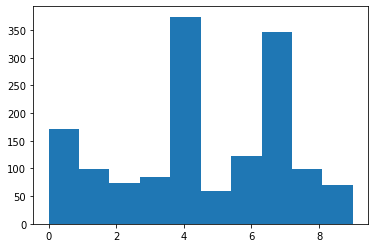

In [7]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.show()